In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Regression

/content/drive/MyDrive/Colab Notebooks/Pellegrini Projects/Inbreeding/Regression


In [3]:
df=pd.read_csv('meandepth-inbreeding.csv')
df=df[["Unnamed: 0","meandepth","KB","F"]]
df.set_index("Unnamed: 0", inplace=True)
df.index.name=None
df.sort_values(by="meandepth",inplace=True)
df

,meandepth,KB,F
87,0.088328,2131910.0,0.3897
29,0.092072,1725630.0,0.3810
67,0.095135,2143780.0,0.4756
41,0.105250,2101440.0,0.2982
65,0.107047,2150360.0,0.5562
...,...,...,...
61,0.389640,516081.0,-0.7292
14,0.391232,737722.0,-0.6023
89,0.402968,770376.0,-0.6316
30,0.521386,544340.0,-0.8786


In [4]:
rohreturnvalue=sm.nonparametric.lowess(df["KB"],df["meandepth"],frac=0.7,it=1,return_sorted=False)

In [5]:
freturnvalue=sm.nonparametric.lowess(df["F"],df["meandepth"],frac=0.6,it=8,return_sorted=False)

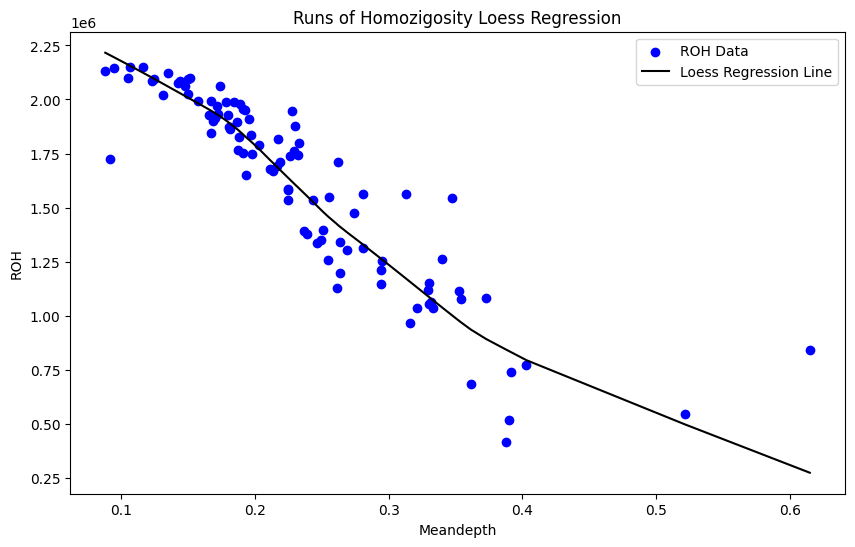

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df["meandepth"], df["KB"], color='blue', label='ROH Data')
plt.plot(df["meandepth"], rohreturnvalue, color='black', label='Loess Regression Line')
plt.xlabel('Meandepth')
plt.ylabel('ROH')
plt.title('Runs of Homozigosity Loess Regression')
plt.legend()
#plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/Runs of Homozigosity Loess Regression.png')
plt.show()

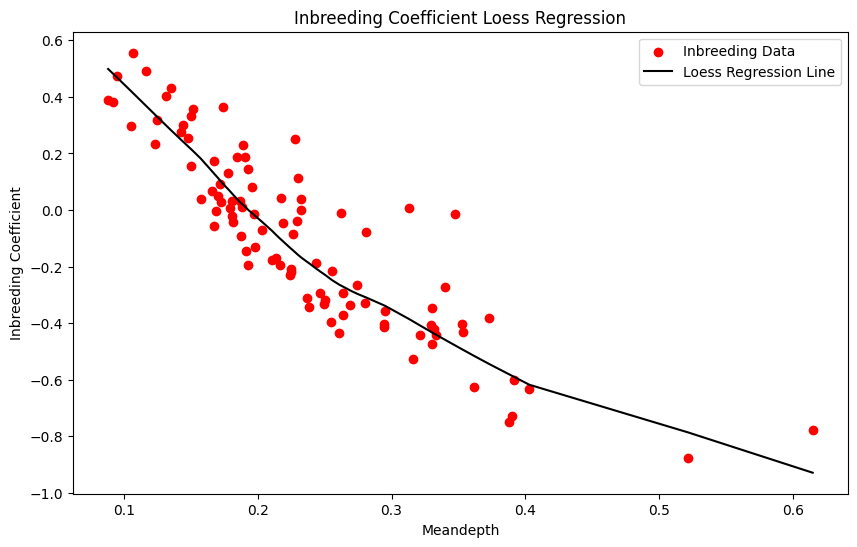

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df["meandepth"], df["F"], color='red', label='Inbreeding Data')
plt.plot(df["meandepth"], freturnvalue, color='black', label='Loess Regression Line')
plt.xlabel('Meandepth')
plt.ylabel('Inbreeding Coefficient')
plt.title('Inbreeding Coefficient Loess Regression')
plt.legend()
#plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/Inbreeding Coefficient Loess Regression.png')
plt.show()

In [8]:
df['ROH residuals']=df['KB']-rohreturnvalue
df['Inbreeding residuals']=df['F']-freturnvalue

In [9]:
rohresidualreturnvalue=sm.nonparametric.lowess(df["ROH residuals"],df["meandepth"],frac=0.7,it=4)

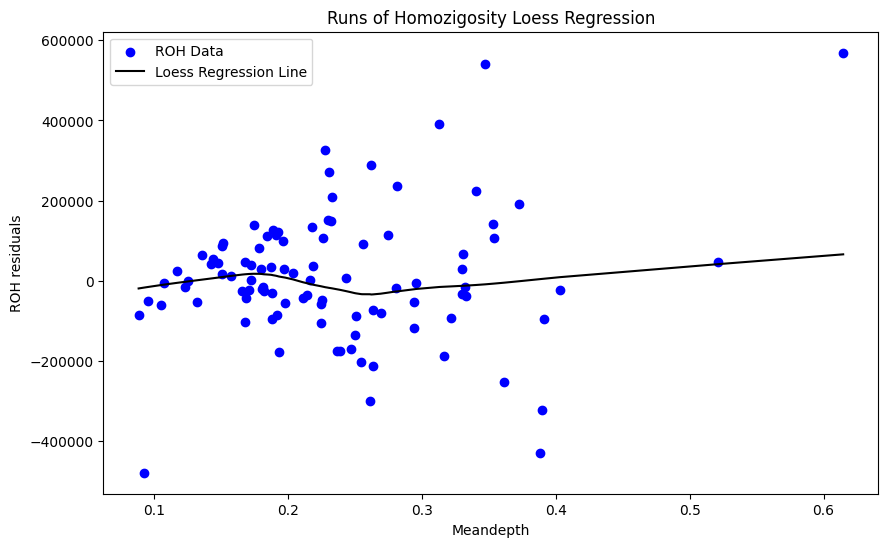

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df["meandepth"], df["ROH residuals"], color='blue', label='ROH Data')
plt.plot(rohresidualreturnvalue[0:,0], rohresidualreturnvalue[0:,1], color='black', label='Loess Regression Line')
plt.xlabel('Meandepth')
plt.ylabel('ROH residuals')
plt.title('Runs of Homozigosity Loess Regression')
plt.legend()
#plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/Runs of Homozigosity Loess Regression.png')
plt.show()

In [11]:
fresidualreturnvalue=sm.nonparametric.lowess(df["Inbreeding residuals"],df["meandepth"],frac=0.7,it=4)

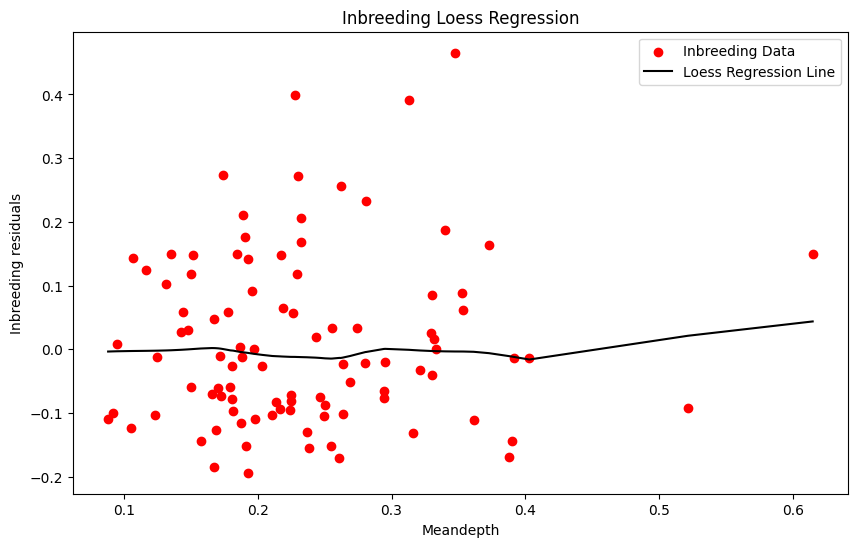

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df["meandepth"], df["Inbreeding residuals"], color='red', label='Inbreeding Data')
plt.plot(fresidualreturnvalue[0:,0], fresidualreturnvalue[0:,1], color='black', label='Loess Regression Line')
plt.xlabel('Meandepth')
plt.ylabel('Inbreeding residuals')
plt.title('Inbreeding Loess Regression')
plt.legend()
#plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/Inbreeding Loess Regression.png')
plt.show()

In [13]:
ROHInbreedingcorrelation=sm.nonparametric.lowess(df["ROH residuals"],df["Inbreeding residuals"],frac=0.5,it=4)

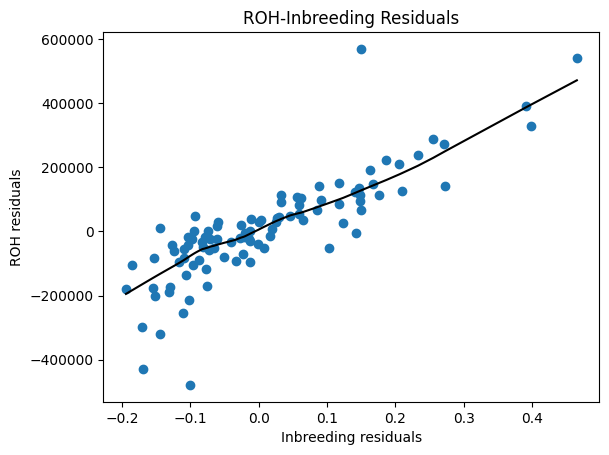

In [14]:
plt.scatter(df["Inbreeding residuals"], df["ROH residuals"])
plt.plot(ROHInbreedingcorrelation[0:,0], ROHInbreedingcorrelation[0:,1],color='black')
plt.xlabel('Inbreeding residuals')
plt.ylabel('ROH residuals')
plt.title('ROH-Inbreeding Residuals')
#plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/ROH-Inbreeding Residuals and Regression.png')
plt.show()

In [15]:
dogdf=pd.read_excel('dog_details.xlsx')
dogdf.dropna(subset=['kraken'],inplace=True)
dogdf.set_index('SAMPLE NO.',inplace=True)
dogdf.index.name=None
dogdf=dogdf['BREED']

In [16]:
df['breed']=dogdf
df.sort_values(by='Inbreeding residuals')

,meandepth,KB,F,ROH residuals,Inbreeding residuals,breed
44,0.193176,1648490.0,-0.194400,-178506.166877,-0.193993,FRENCH BULLDOG
99,0.167433,1844140.0,-0.055720,-103659.358867,-0.184713,Shiba Inu+Bichon Frise Mix
6,0.261109,1126740.0,-0.435200,-298498.163050,-0.170834,GERMAN SHEPHERD & HUSKY MIX
115,0.387909,414341.0,-0.750100,-428407.199891,-0.169021,Saluki+Alaskan sled dog (50/50)
42,0.238704,1379630.0,-0.344100,-175662.229486,-0.154897,CAUCASIAN SHEPHERD
...,...,...,...,...,...,...
96,0.230171,1878060.0,0.113300,271945.193687,0.271857,Irish Wolfhound
95,0.174155,2061910.0,0.365500,140027.252968,0.273003,Irish Wolfhound
92,0.313049,1563160.0,0.006494,391736.714389,0.391796,golden retriever/chesapeake bay retriver
17,0.227788,1947790.0,0.250600,327407.329252,0.398992,WEST HIGHLAND WHITE TERRIER


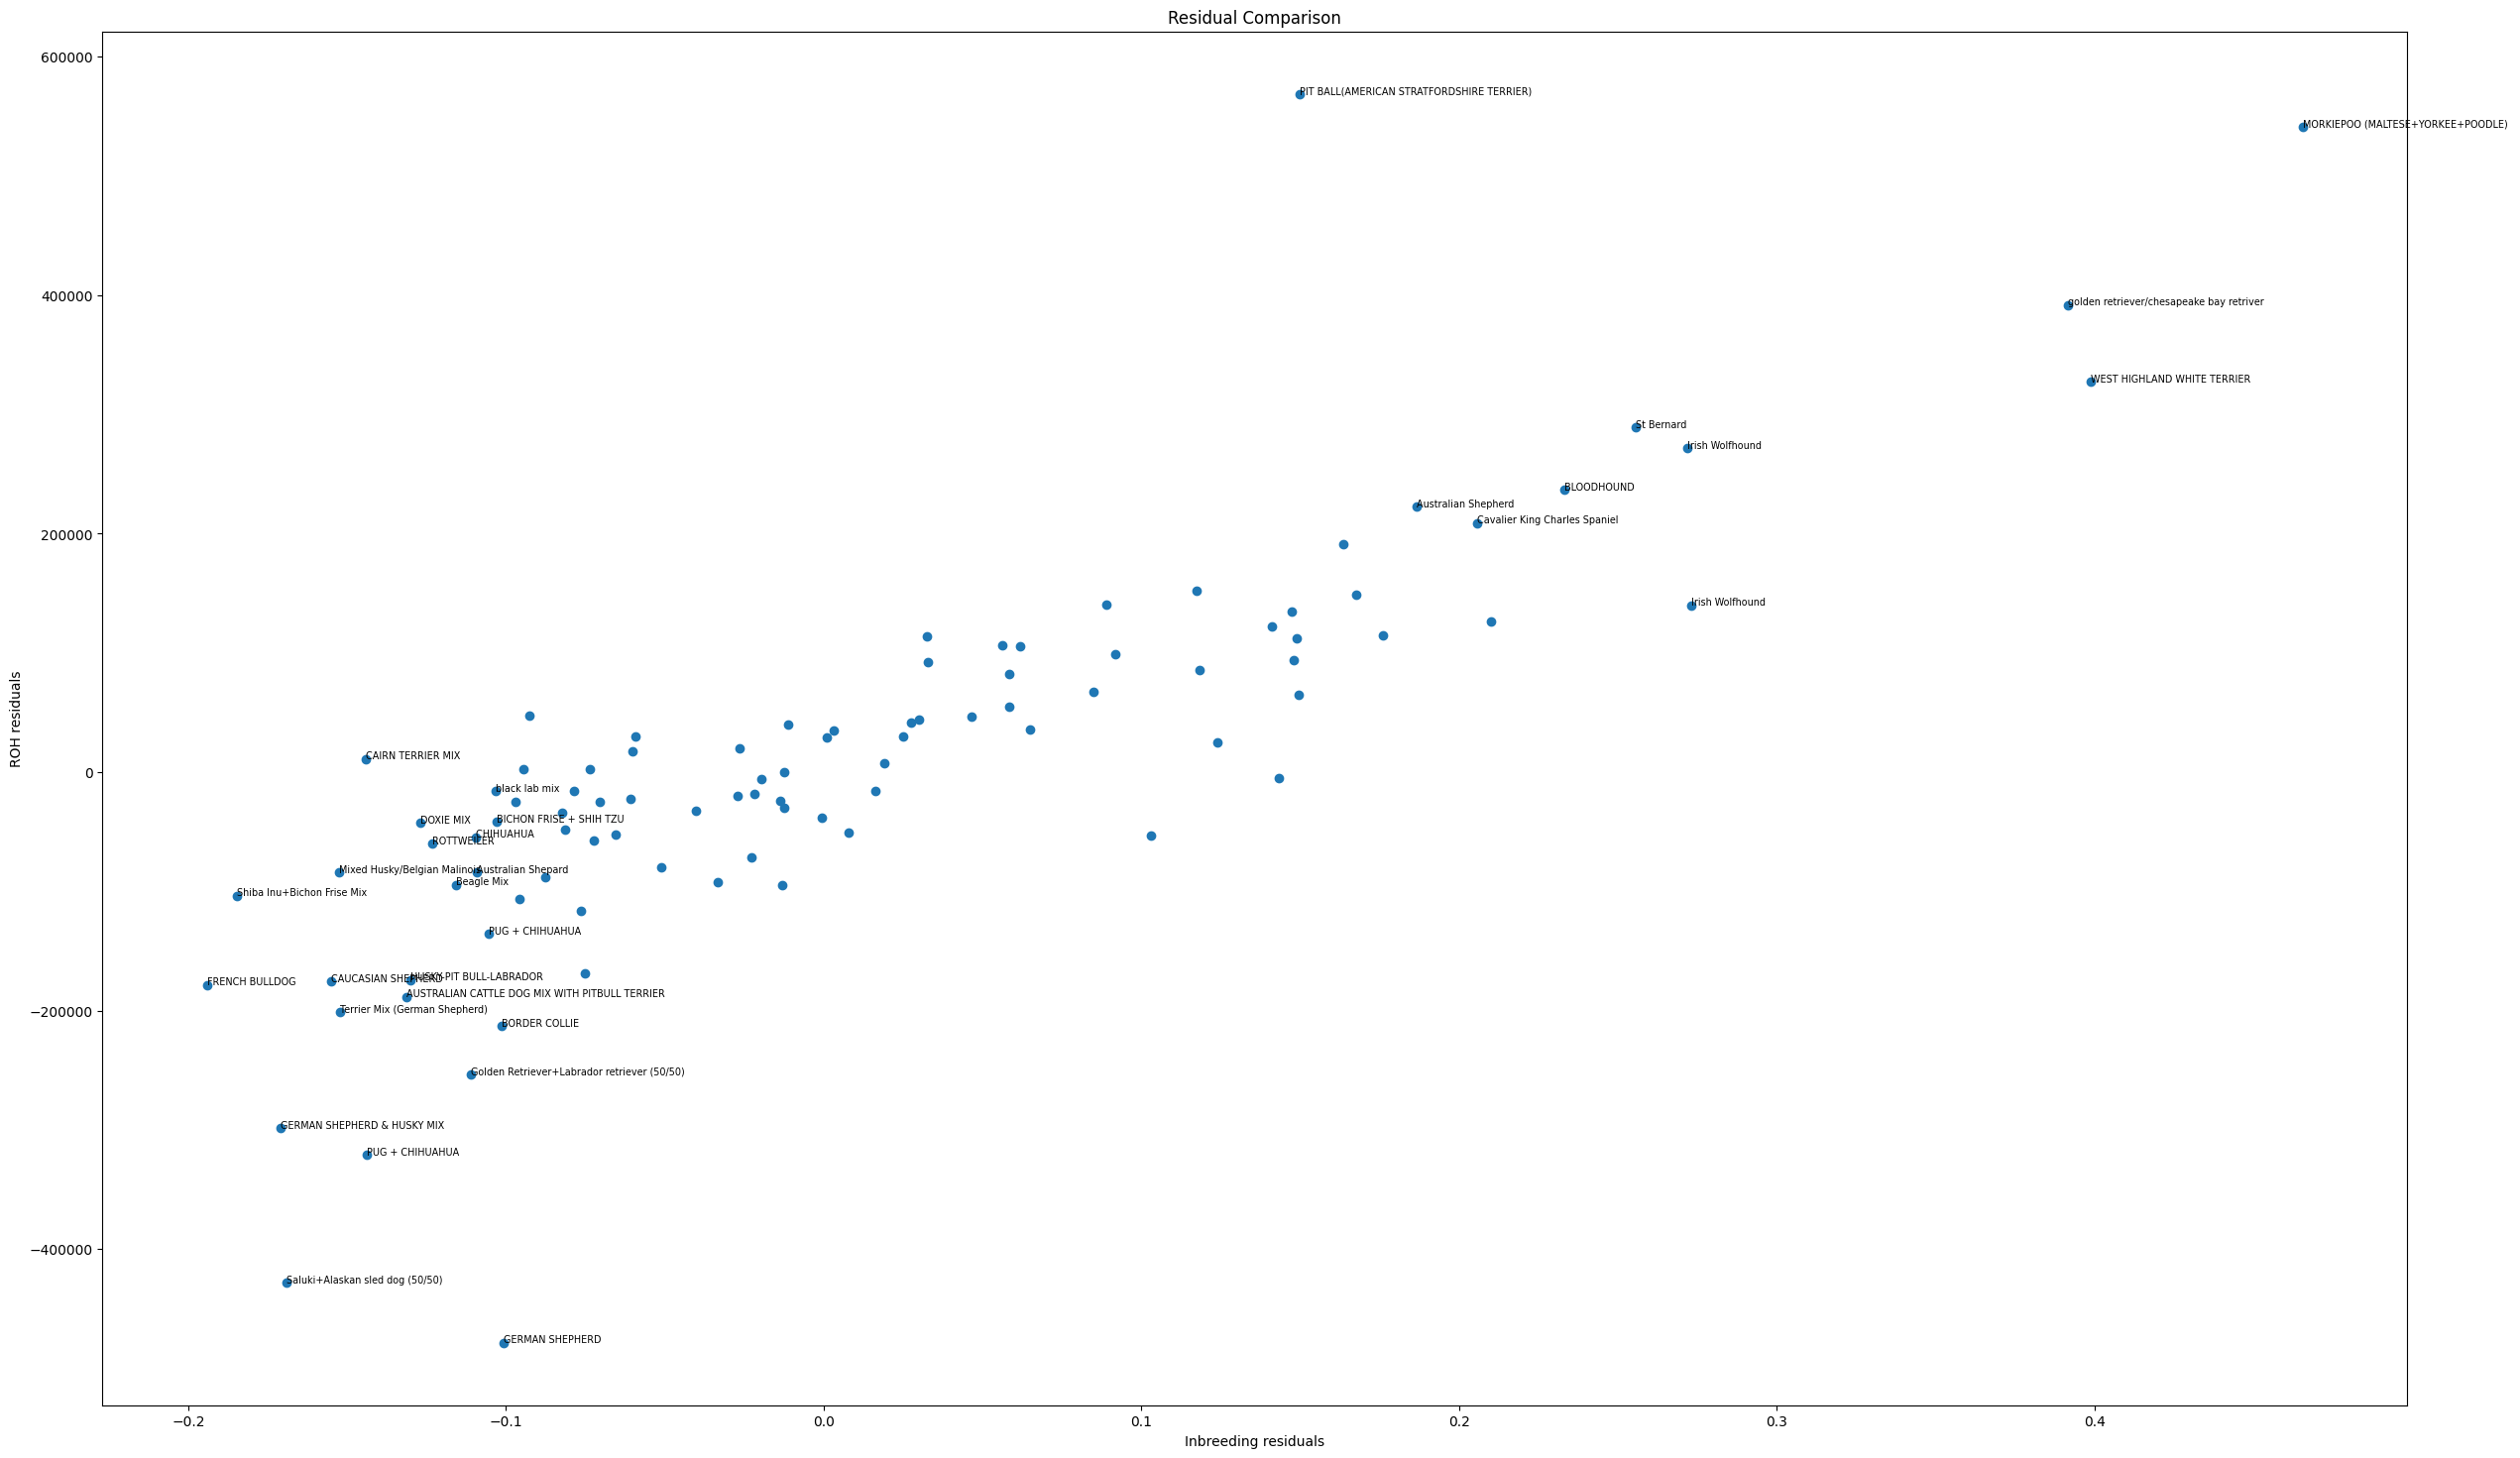

In [17]:
plt.figure(figsize=(30, 18))
plt.scatter(df["Inbreeding residuals"], df["ROH residuals"])
plt.xlabel("Inbreeding residuals")
plt.ylabel('ROH residuals')
plt.title('Residual Comparison')
for k,v in df.iterrows():
  if (v['ROH residuals']<-300000 or v['Inbreeding residuals']<-0.1)or(v['ROH residuals']>200000 or v['Inbreeding residuals']>0.25):
    plt.annotate(v["breed"], (v["Inbreeding residuals"], v["ROH residuals"]),fontsize='x-small')
#plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/Residual Comparison labeled.png')
plt.show()

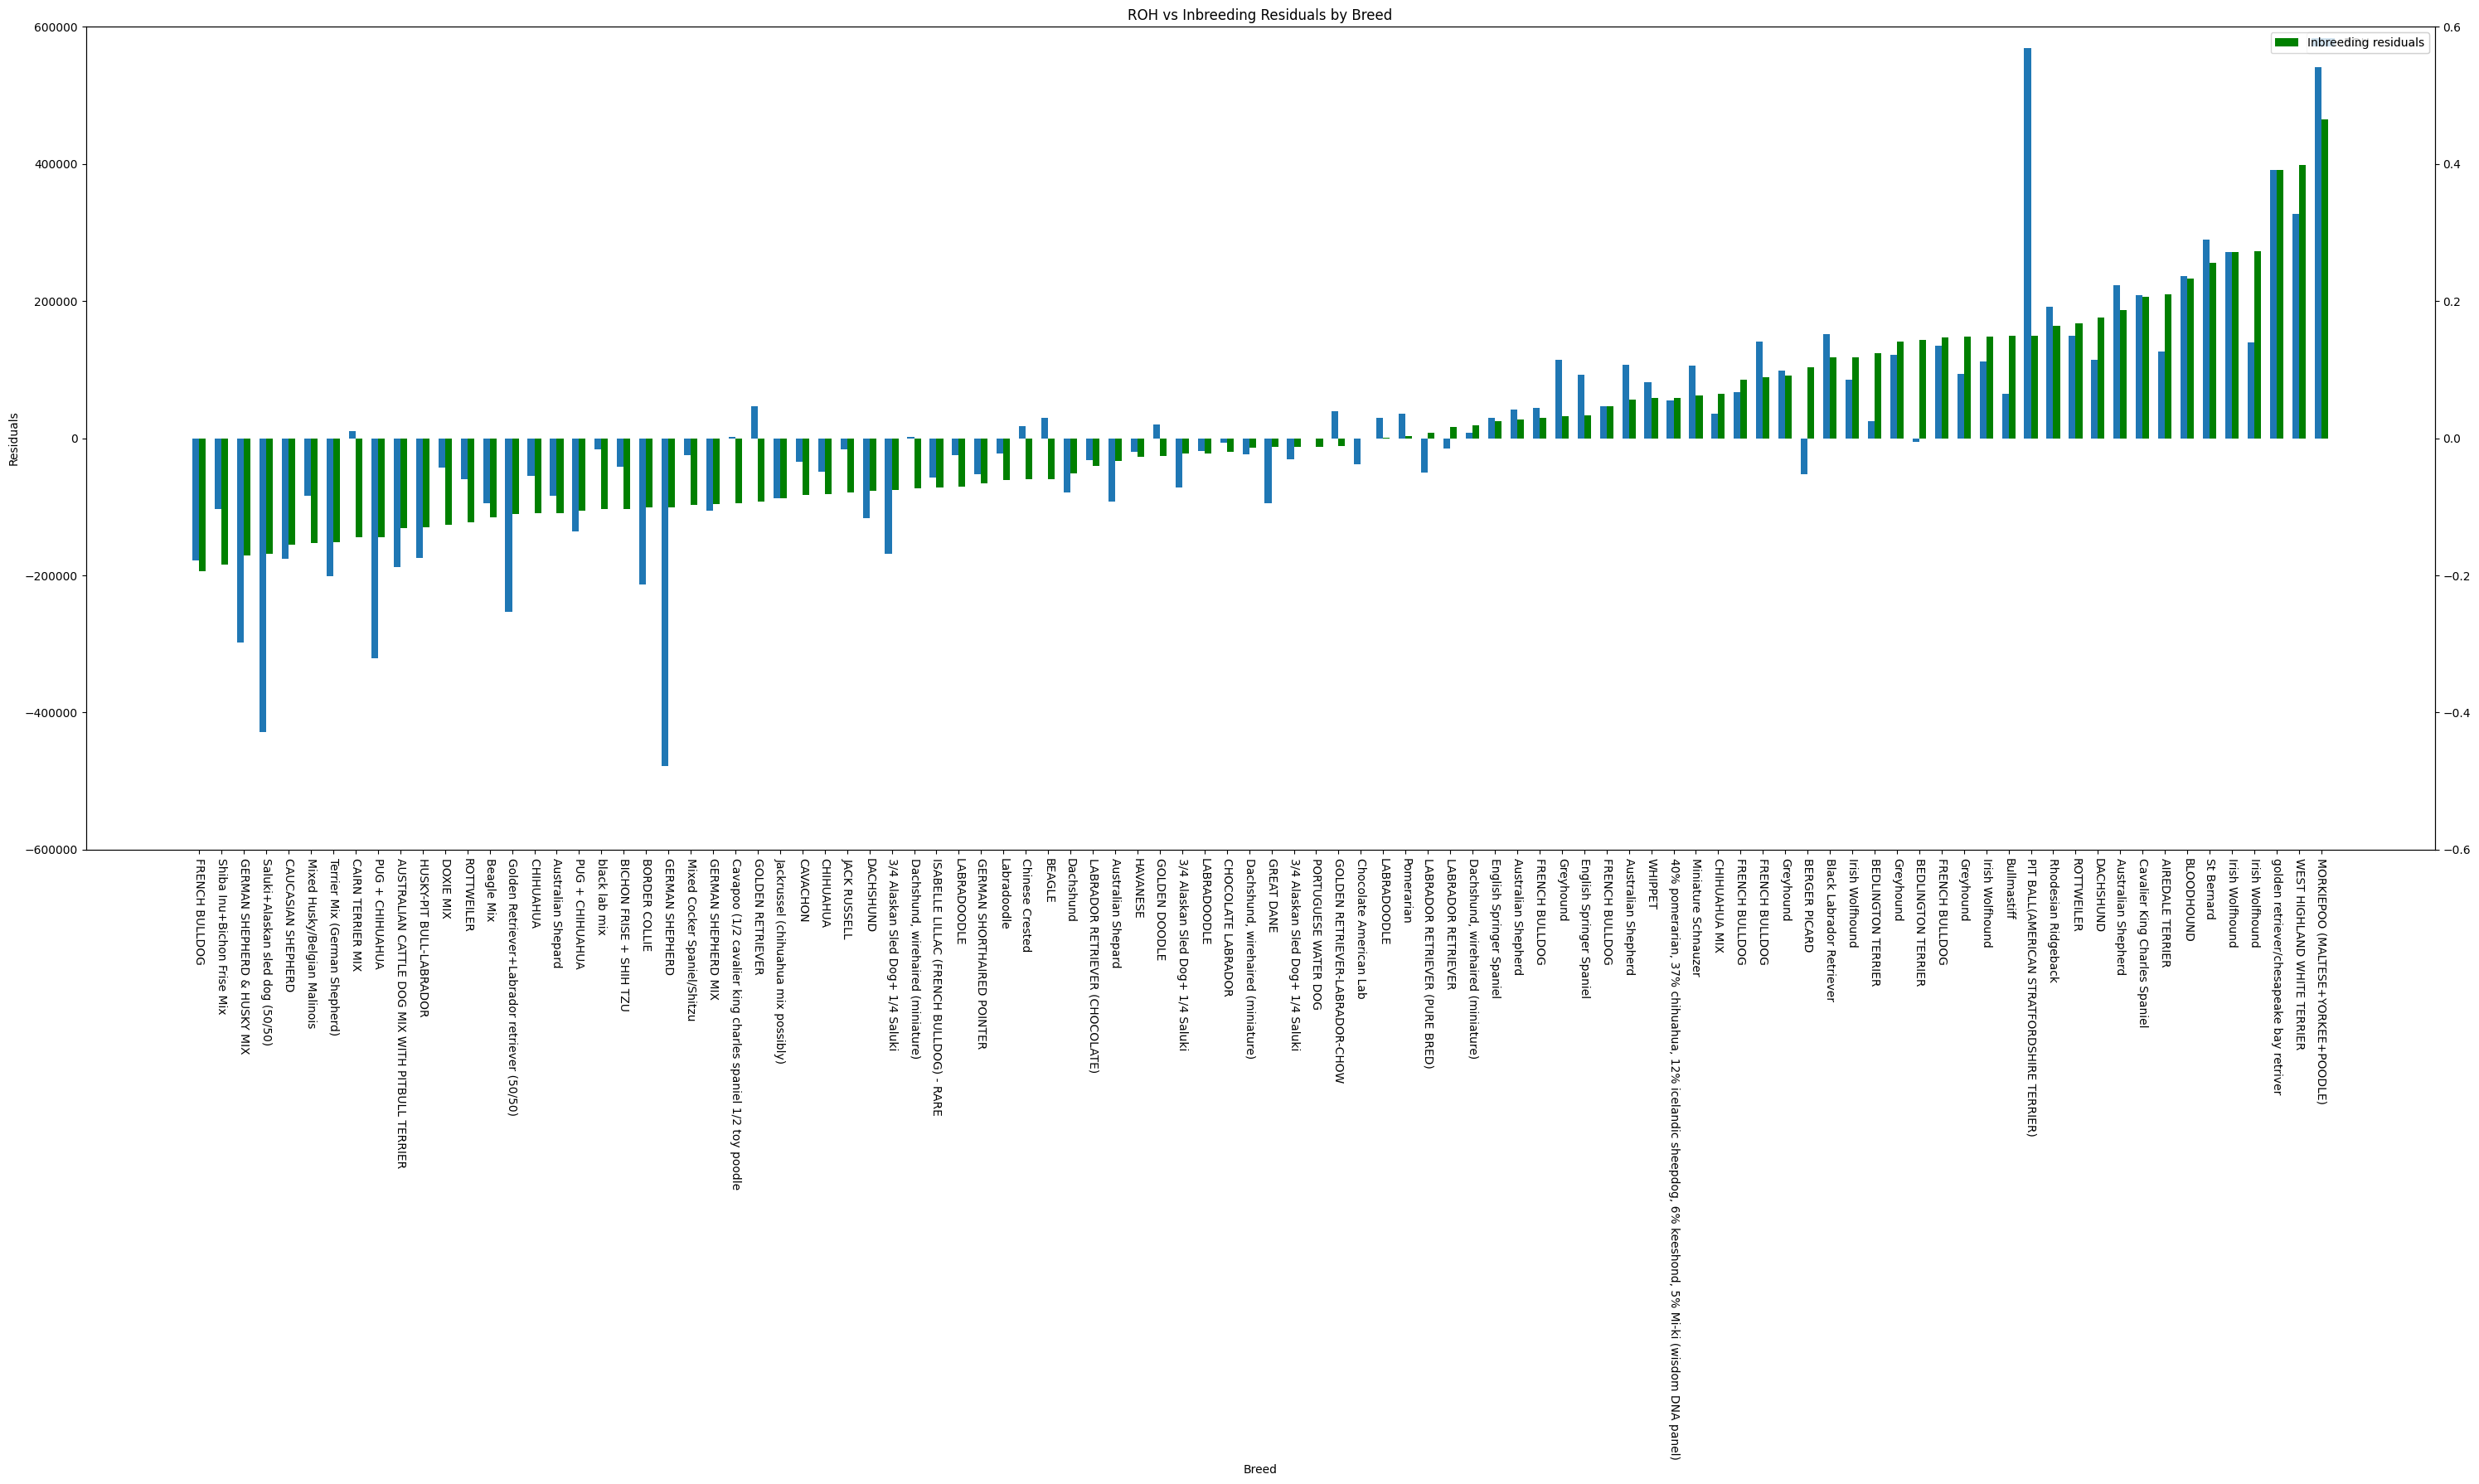

In [18]:
df.sort_values(by='Inbreeding residuals', inplace=True)
fig, ax = plt.subplots(figsize=(30,18))
ax2=ax.twinx()

bar_width = 0.3
index = range(len(df['breed']))

roh_bars = ax.bar(index, df['ROH residuals'], bar_width, label='ROH residuals')
inbreeding_bars = ax2.bar([i + bar_width for i in index], df['Inbreeding residuals'], bar_width, label='Inbreeding residuals',color='green')

ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(df['breed'], rotation=-90)

ax.set_xlabel('Breed')
ax.set_ylabel('Residuals')
ax.set_title('ROH vs Inbreeding Residuals by Breed')

ax.set_ylim(-600000,600000)
ax2.set_ylim(-0.6, 0.6)

ax.legend()
ax2.legend()
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/full ROH v Inbreeding Residuals.png')
plt.show()

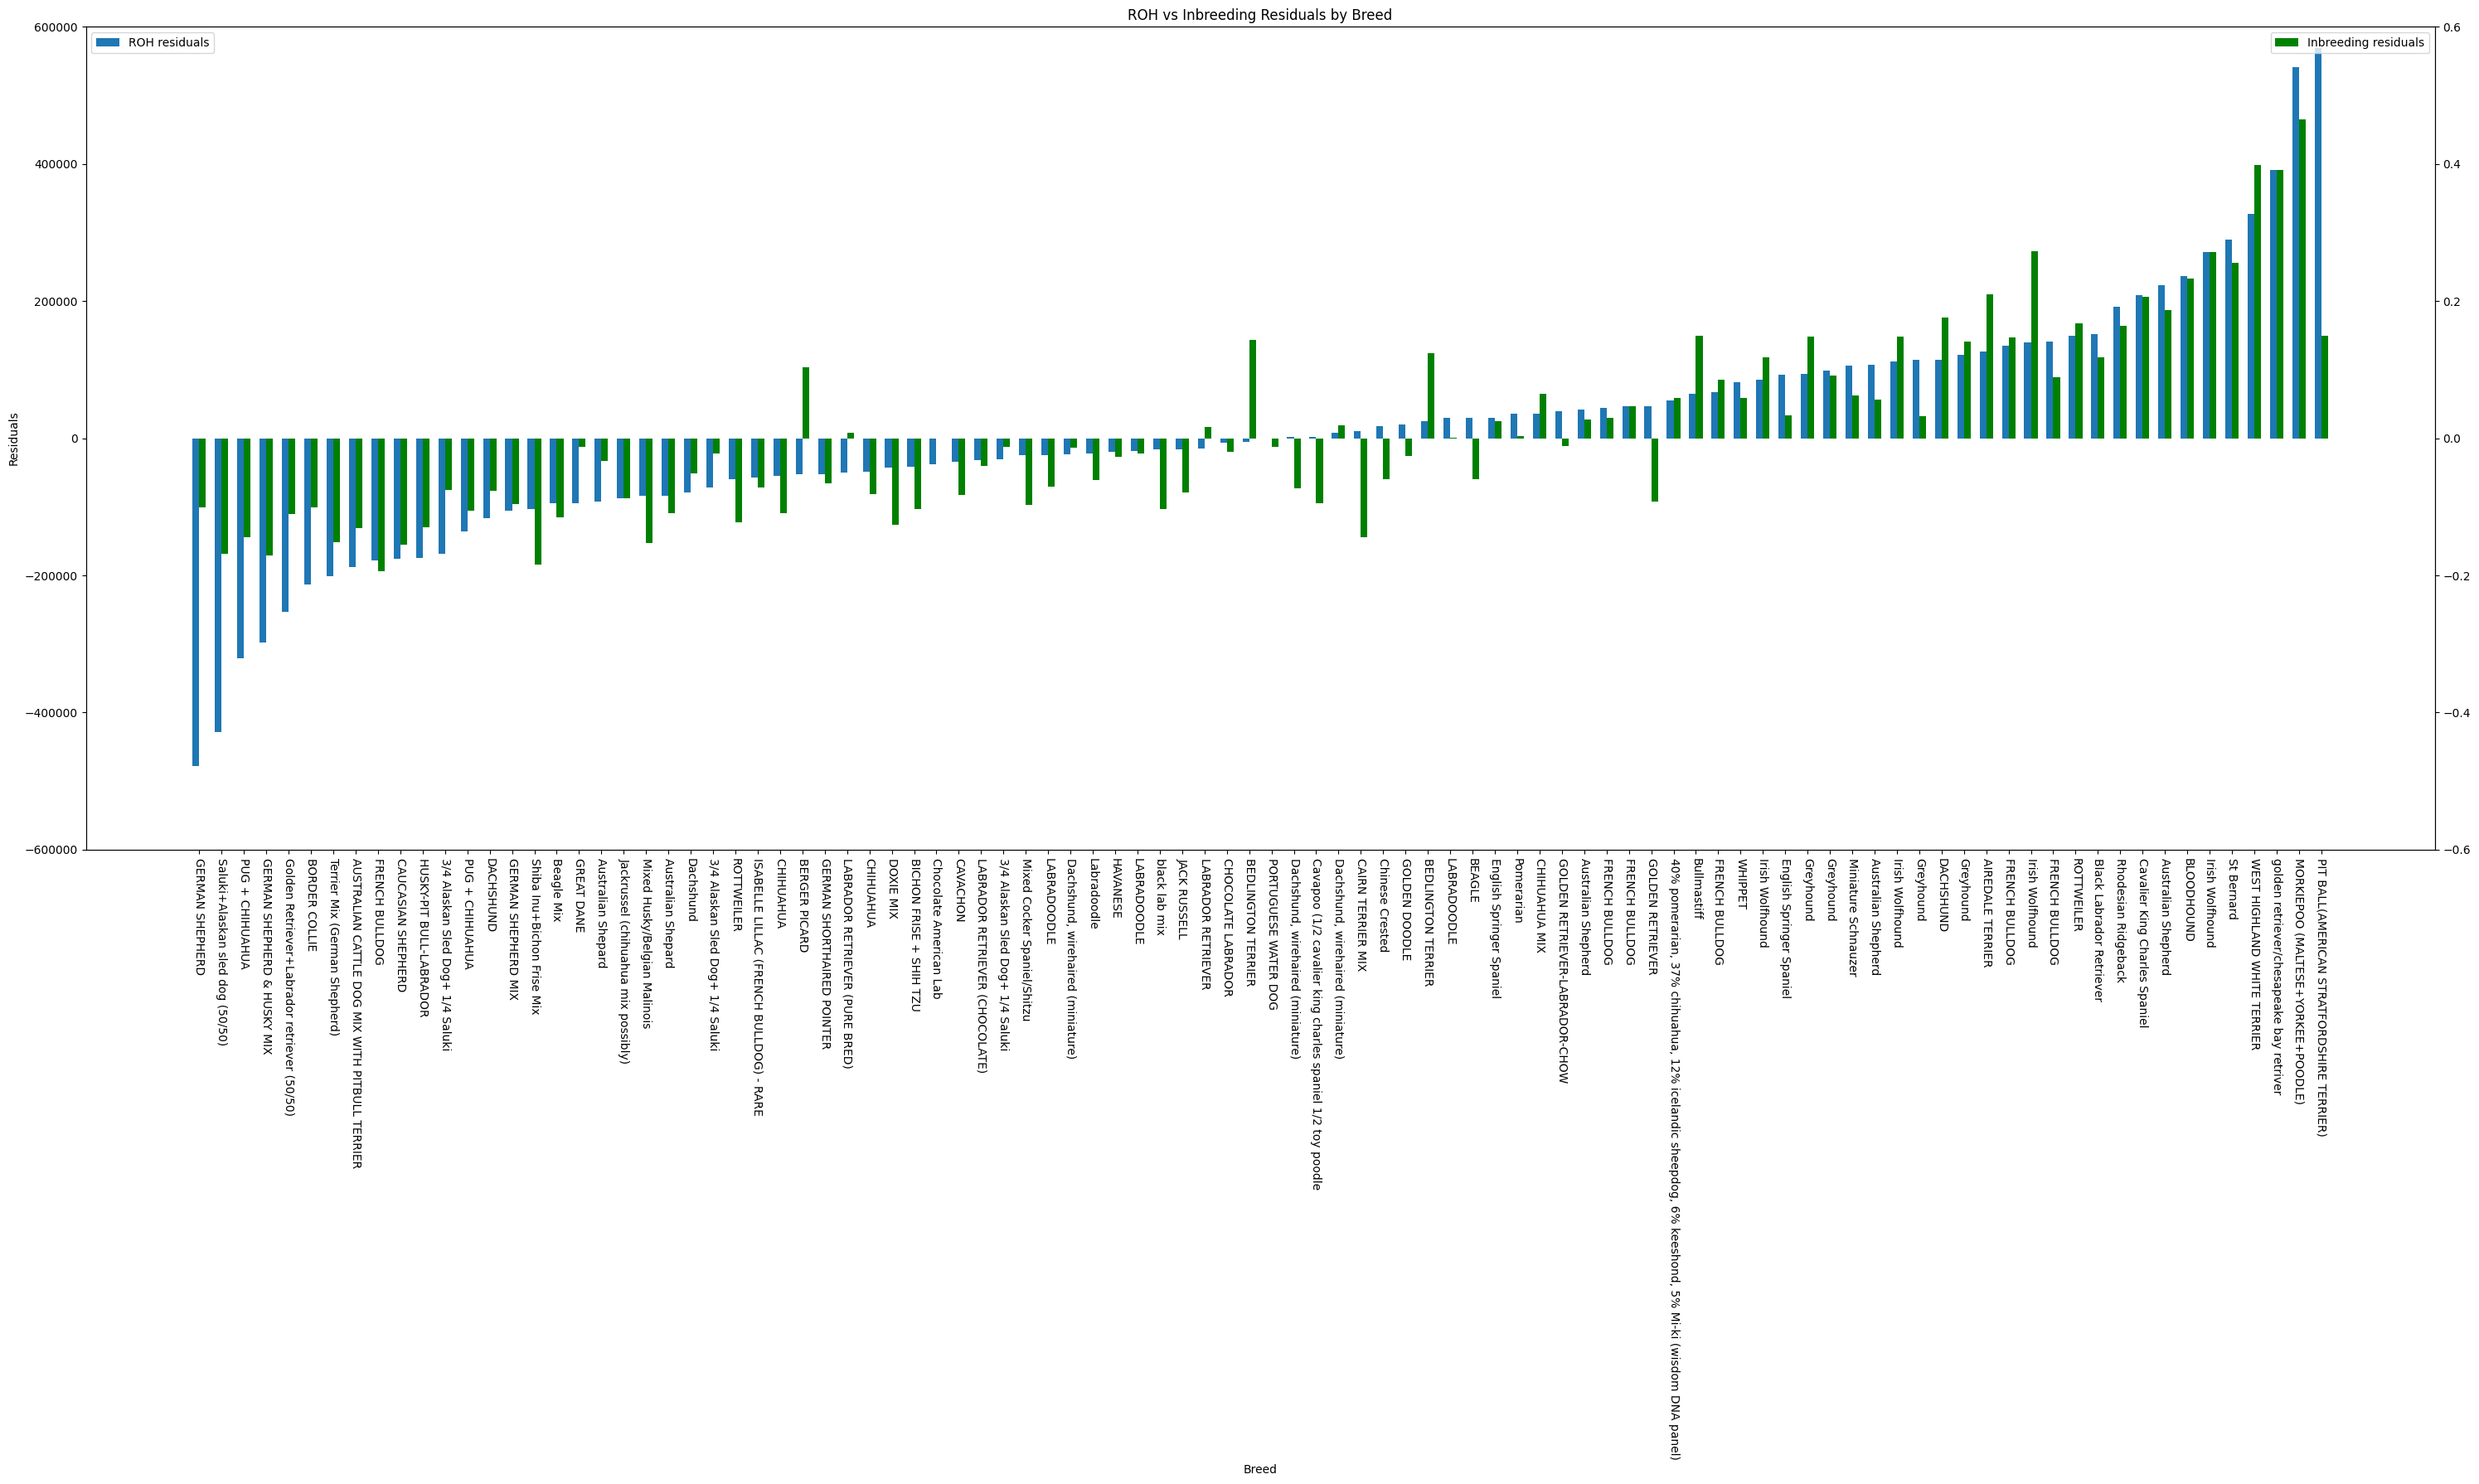

In [19]:
df.sort_values(by='ROH residuals', inplace=True)
fig, ax = plt.subplots(figsize=(30,18))
ax2=ax.twinx()

bar_width = 0.3
index = range(len(df['breed']))

roh_bars = ax.bar(index, df['ROH residuals'], bar_width, label='ROH residuals')
inbreeding_bars = ax2.bar([i + bar_width for i in index], df['Inbreeding residuals'], bar_width, label='Inbreeding residuals',color='green')

ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(df['breed'], rotation=-90)

ax.set_xlabel('Breed')
ax.set_ylabel('Residuals')
ax.set_title('ROH vs Inbreeding Residuals by Breed')

ax.set_ylim(-600000,600000)
ax2.set_ylim(-0.6, 0.6)

ax.legend()
ax2.legend()
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/full ROH v Inbreeding residuals ordered by ROH residuals.png')
plt.show()

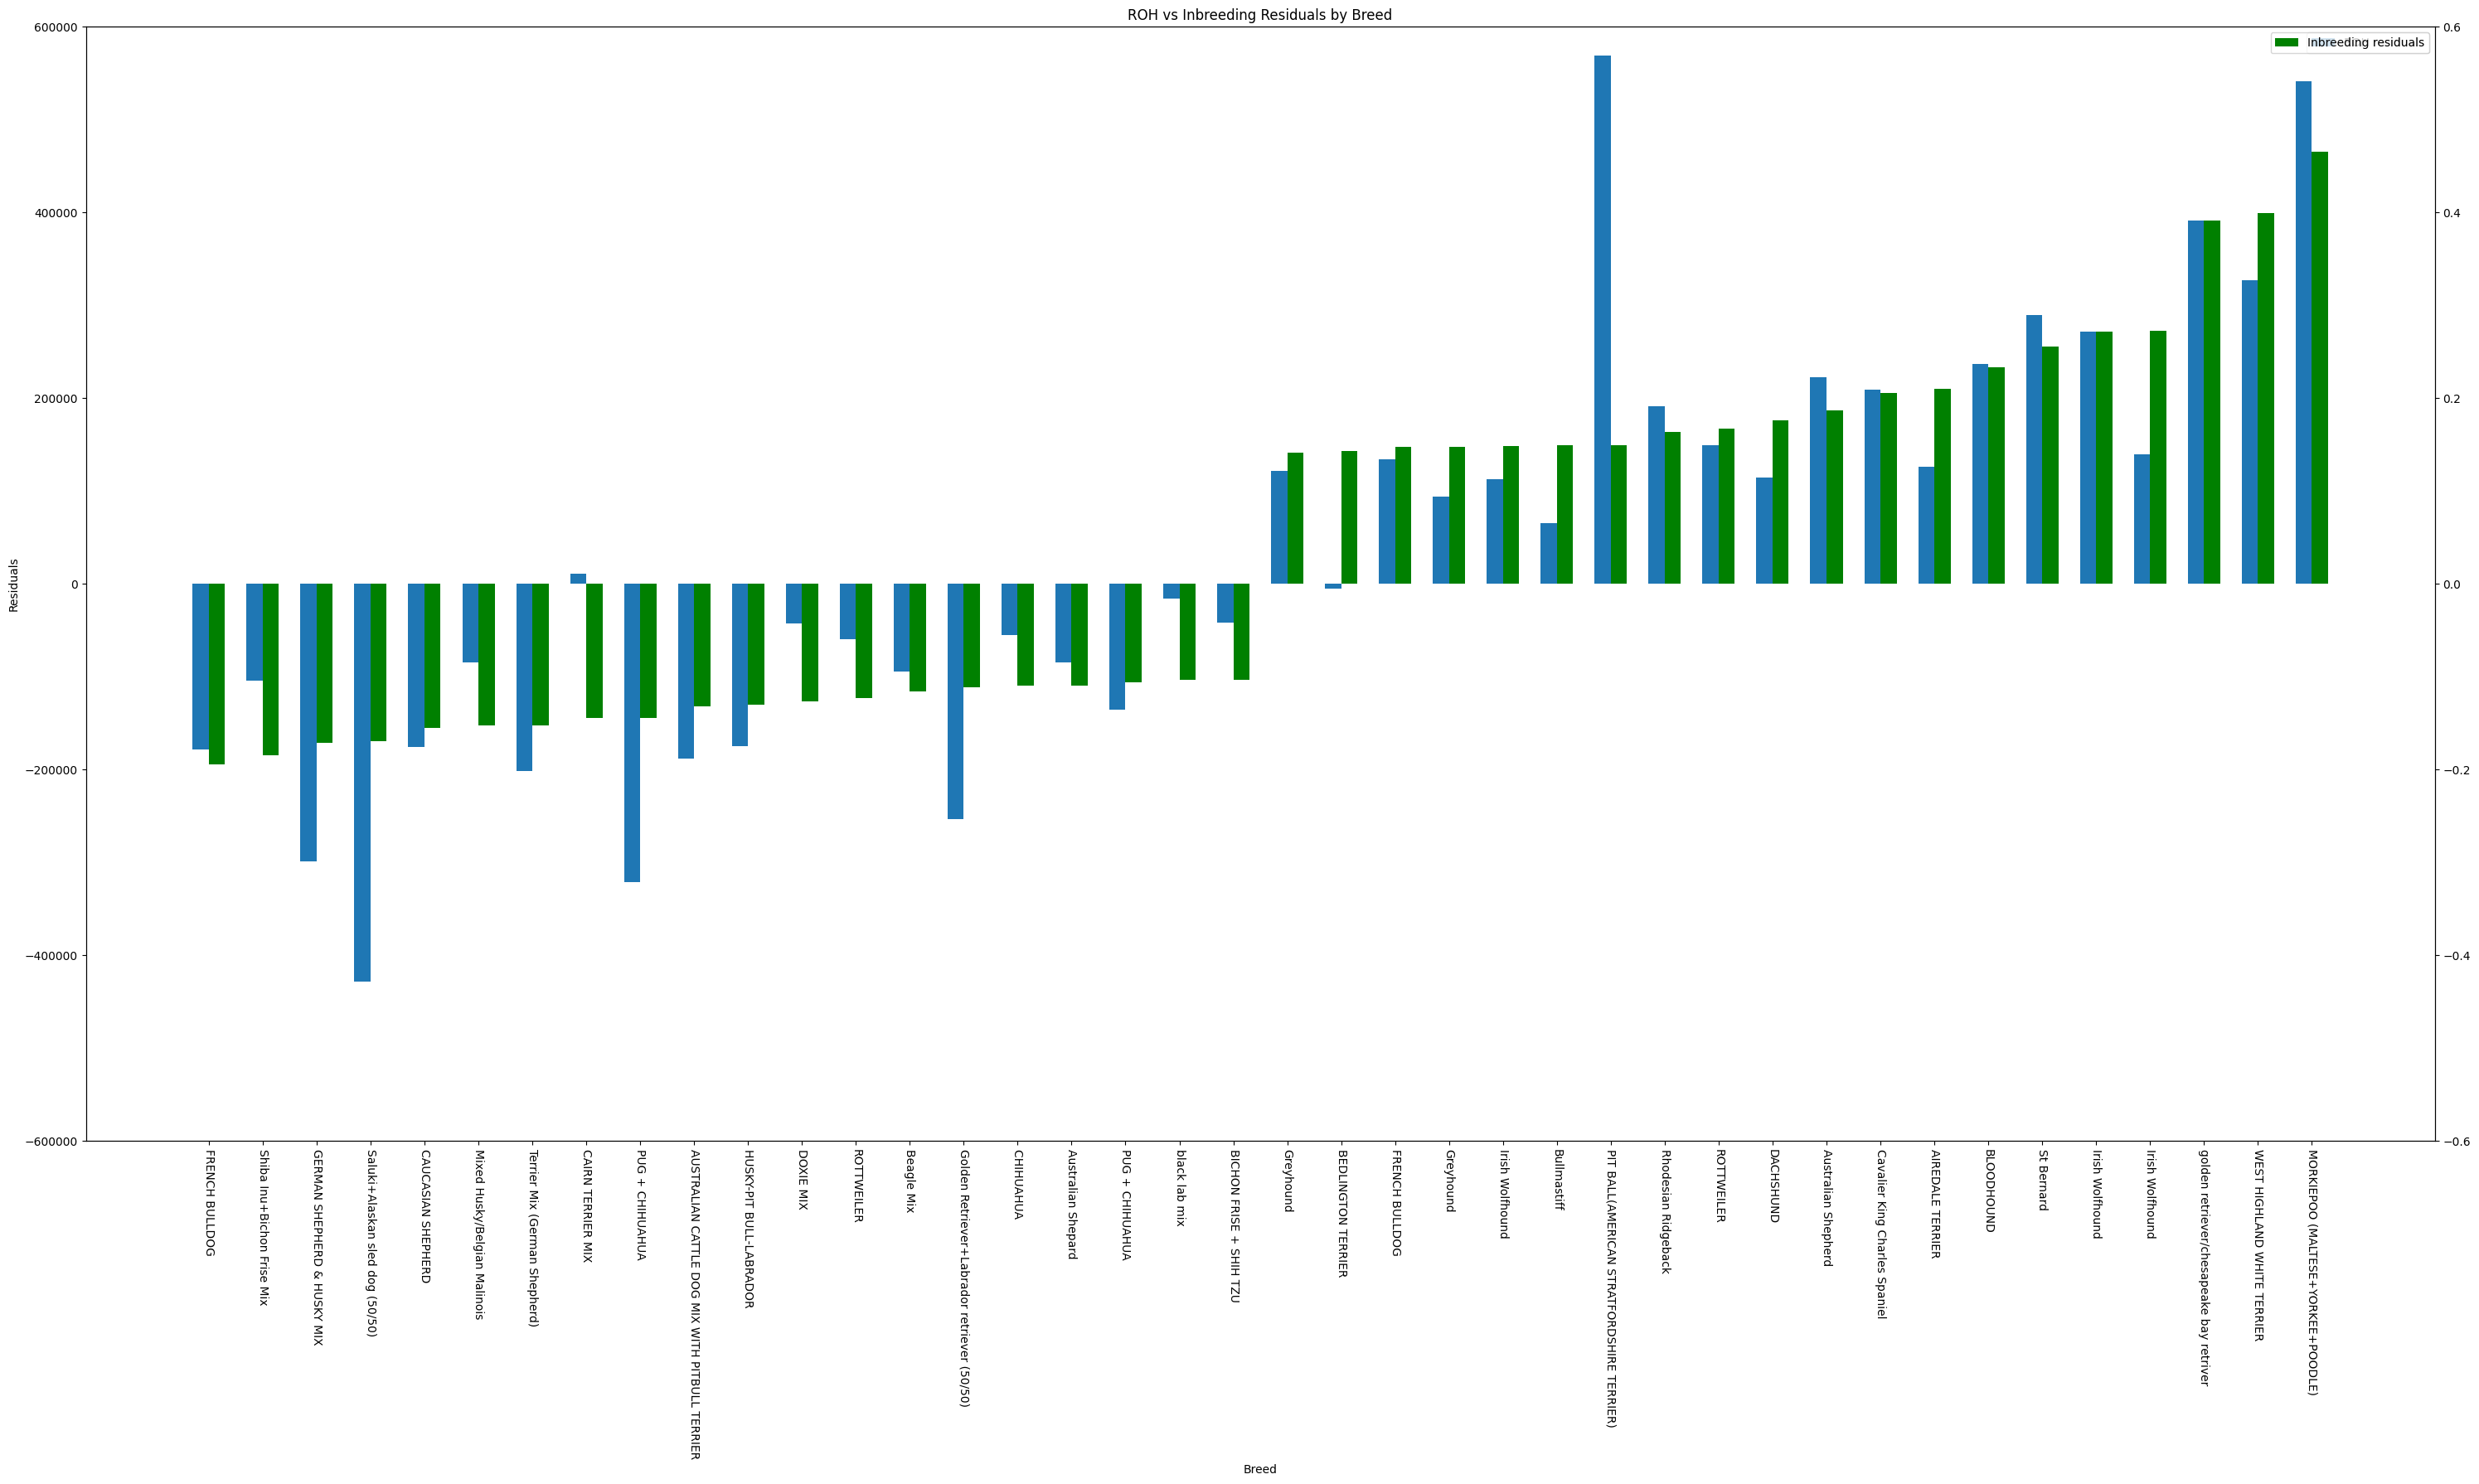

In [20]:
df.sort_values(by='Inbreeding residuals', inplace=True)
concatdf=pd.concat([df.head(20),df.tail(20)])
fig, ax = plt.subplots(figsize=(30,18))
ax2=ax.twinx()

bar_width = 0.3
index = range(len(concatdf['breed']))

roh_bars = ax.bar(index, concatdf['ROH residuals'], bar_width, label='ROH residuals')
inbreeding_bars = ax2.bar([i + bar_width for i in index], concatdf['Inbreeding residuals'], bar_width, label='Inbreeding residuals',color='green')

ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(concatdf['breed'], rotation=-90)

ax.set_xlabel('Breed')
ax.set_ylabel('Residuals')
ax.set_title('ROH vs Inbreeding Residuals by Breed')

ax.set_ylim(-600000,600000)
ax2.set_ylim(-0.6, 0.6)

ax.legend()
ax2.legend()
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/Short ROH v Inbreeding residuals.png')
plt.show()

In [21]:
df['Inbreeding ranking']=df['Inbreeding residuals'].rank(method='average')
df['ROH ranking']=df['ROH residuals'].rank(method='average')
df['average ranking']=(df['Inbreeding ranking']+df['ROH ranking'])/2

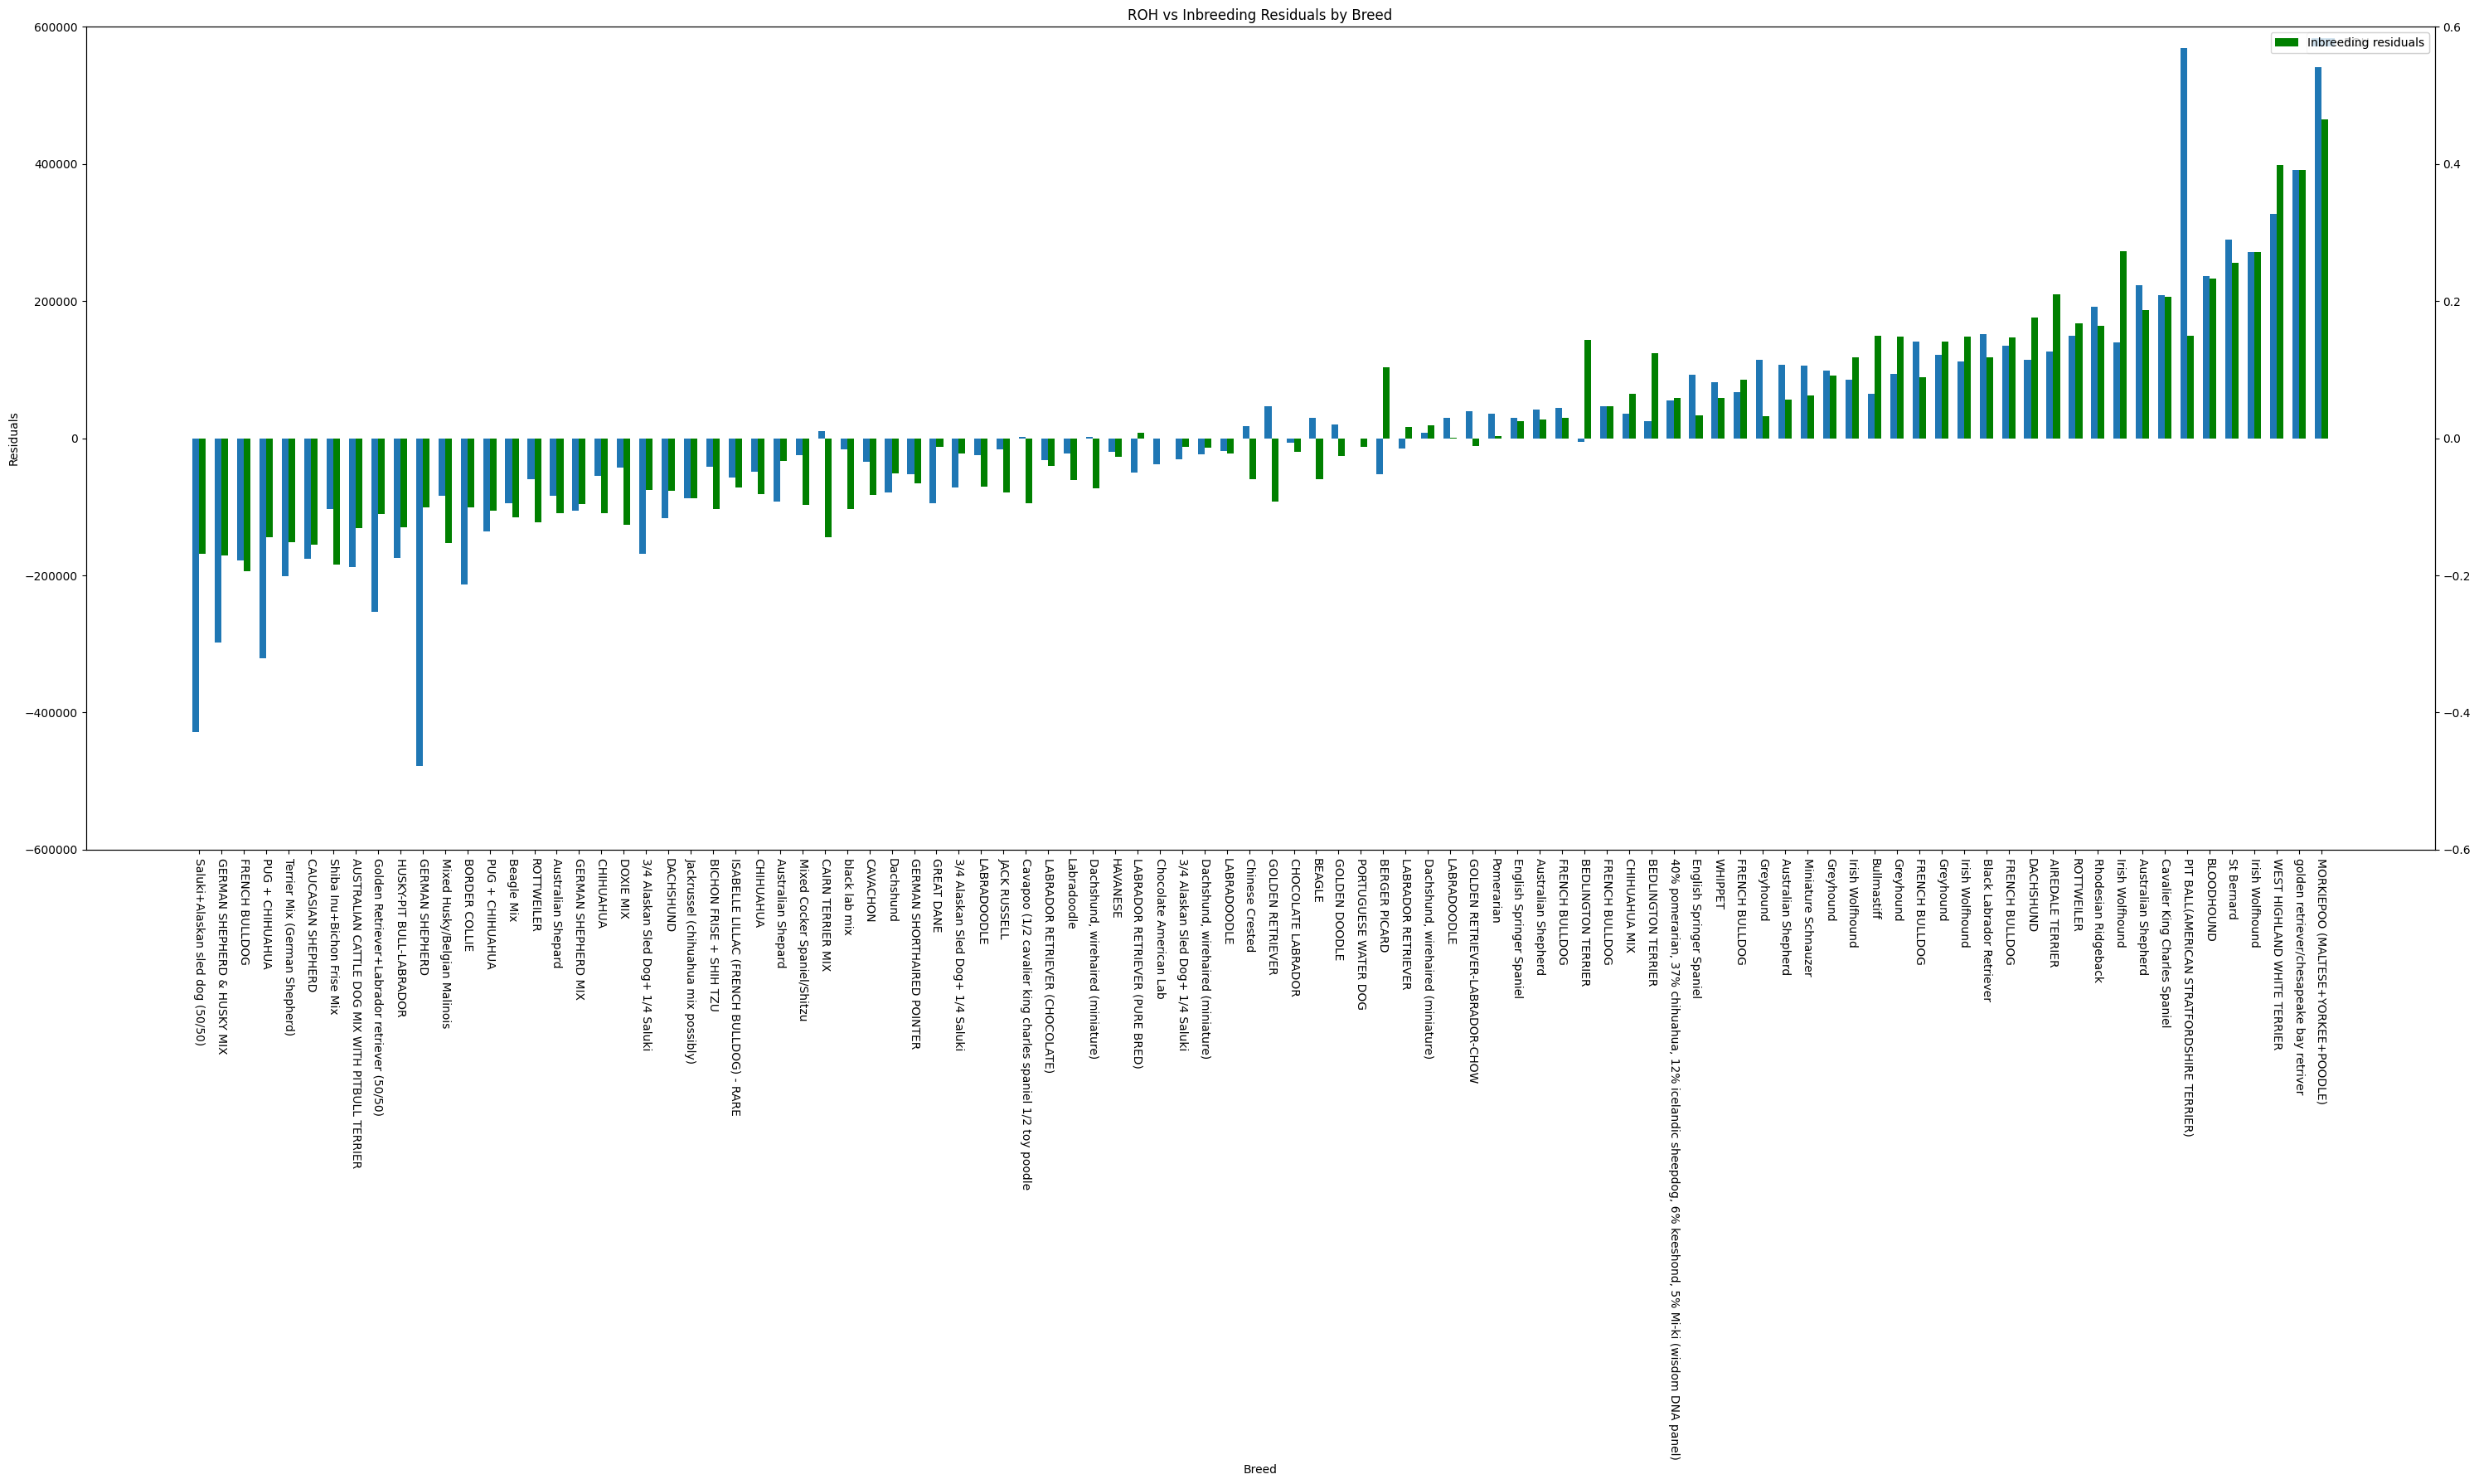

In [22]:
df.sort_values(by='average ranking', inplace=True)
fig, ax = plt.subplots(figsize=(30,18))
ax2=ax.twinx()

bar_width = 0.3
index = range(len(df['breed']))

roh_bars = ax.bar(index, df['ROH residuals'], bar_width, label='ROH residuals')
inbreeding_bars = ax2.bar([i + bar_width for i in index], df['Inbreeding residuals'], bar_width, label='Inbreeding residuals',color='green')

ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(df['breed'], rotation=-90)

ax.set_xlabel('Breed')
ax.set_ylabel('Residuals')
ax.set_title('ROH vs Inbreeding Residuals by Breed')

ax.set_ylim(-600000,600000)
ax2.set_ylim(-0.6, 0.6)

ax.legend()
ax2.legend()
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/full ROH v Inbreeding residuals by average ranking.png')
plt.show()

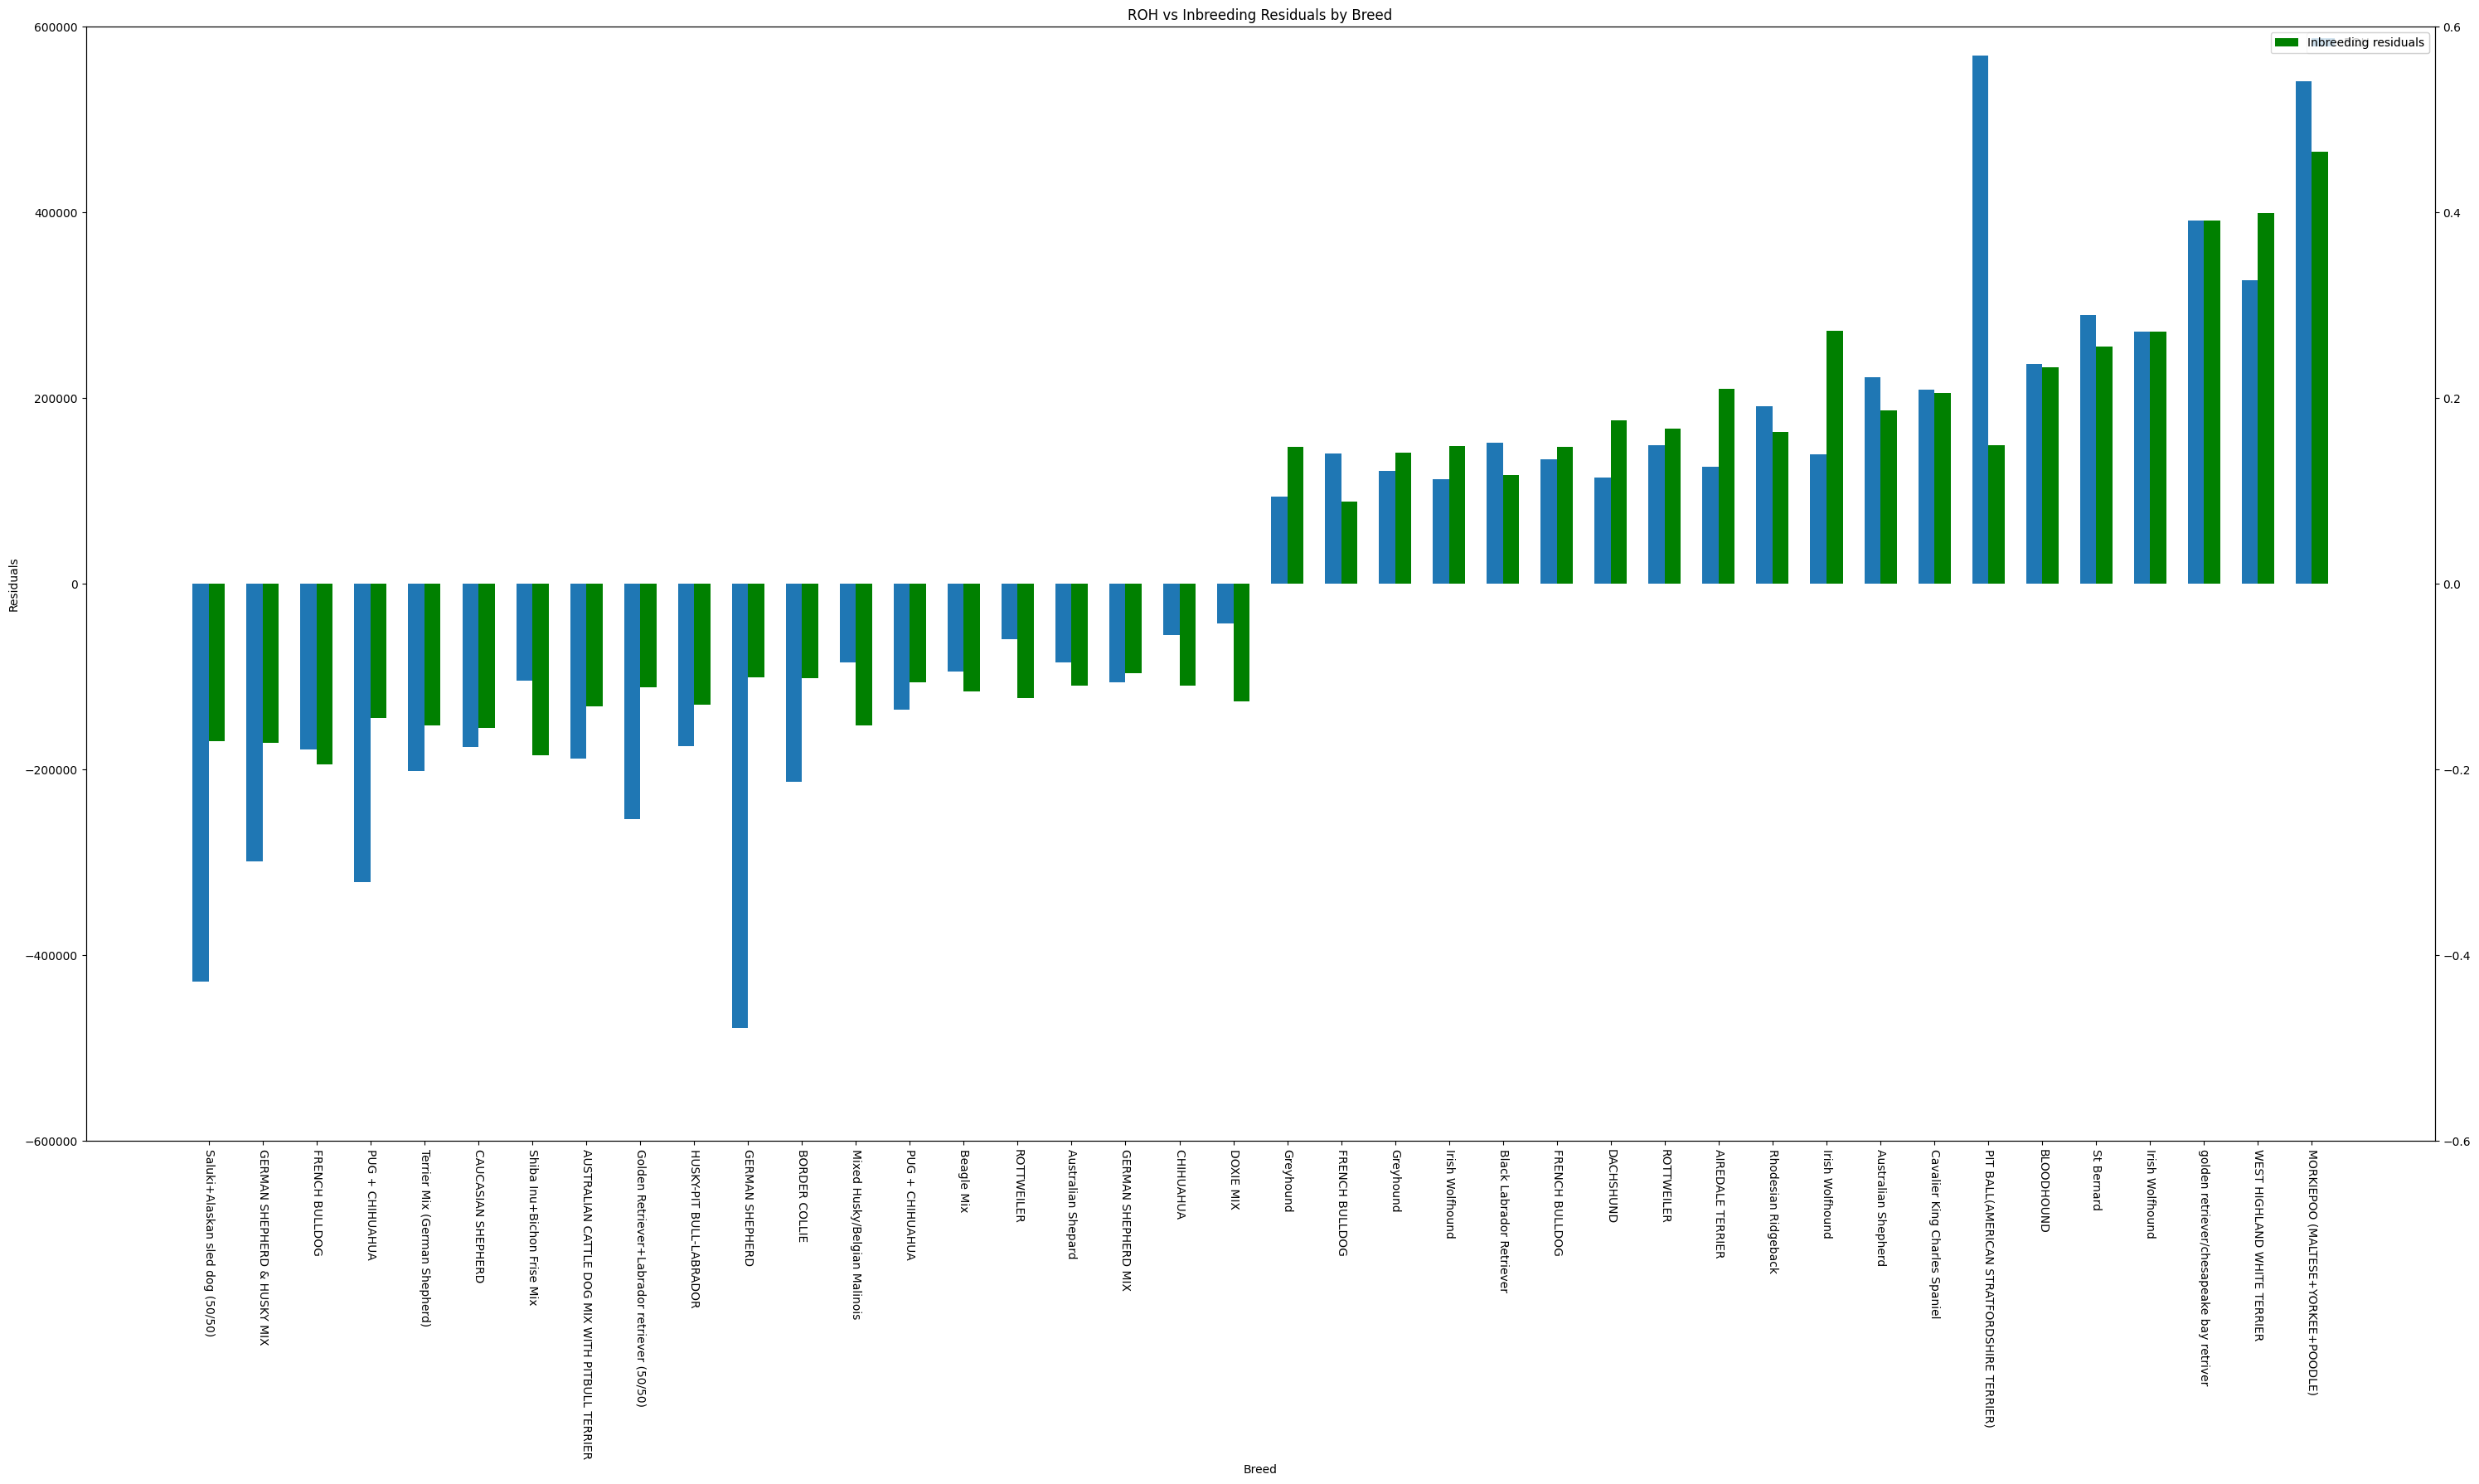

In [23]:
df.sort_values(by='average ranking', inplace=True)
concatdf=pd.concat([df.head(20),df.tail(20)])
fig, ax = plt.subplots(figsize=(30,18))
ax2=ax.twinx()

bar_width = 0.3
index = range(len(concatdf['breed']))

roh_bars = ax.bar(index, concatdf['ROH residuals'], bar_width, label='ROH residuals')
inbreeding_bars = ax2.bar([i + bar_width for i in index], concatdf['Inbreeding residuals'], bar_width, label='Inbreeding residuals',color='green')

ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(concatdf['breed'], rotation=-90)

ax.set_xlabel('Breed')
ax.set_ylabel('Residuals')
ax.set_title('ROH vs Inbreeding Residuals by Breed')

ax.set_ylim(-600000,600000)
ax2.set_ylim(-0.6, 0.6)

ax.legend()
ax2.legend()
plt.tight_layout()
#plt.savefig('/content/drive/MyDrive/Declan-Ryan Shared ROH-Inbreeding Figures/Ryan/Short ROH v Inbreeding residuals by average ranking.png')
plt.show()